In [1]:
# Importing necessary libraries
import cv2
import numpy as np
import math as m
import random

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img=cv2.imread("Mandrill.png",0)

In [4]:
def kernel(sigma):#Returns the kernel matrix for a corresponding sigma
    if (sigma==0):
        return np.array([1])
    limit=m.ceil(6*sigma+1)
    if limit%2==0:
        limit=limit+1
    
    kernel_matrix=np.zeros((limit,limit))
    ran=limit/2
    ran=m.floor(ran)
    x,y=-ran,ran
    sum=0
    for i in range(limit):
        for j in range(limit):
            kernel_matrix[i][j]=m.exp(-((x)**2+(y)**2)/(2*sigma**2))/(2*m.pi*sigma**2)
            x=x+1
        y=y-1
        x=-ran
    
    su=np.sum(kernel_matrix)
    kernel_matrix=kernel_matrix/su
        
    return kernel_matrix


In [5]:
def convolve2D(image,kernel):
    
    if kernel.shape==(1,): #Returns the image if sigma=0
        return image
    
    kernel = np.flipud(np.fliplr(kernel)) #flipping the kernel
    
    kshape=kernel.shape[0]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]
    
    
    padding=kshape//2 #Calculating extra zeros to pad in the image
    
    xout=xImgShape+2*padding 
    yout=yImgShape+2*padding
    
    
    
    output = np.zeros((xout,yout))
    output[padding:-padding,padding:-padding]=image 
    
    output_image = np.zeros((xImgShape,yImgShape)) 
    
    for x in range(padding,image.shape[0]+padding):
        for y in range(padding,image.shape[1]+padding):
            output_image[x-padding,y-padding]=(kernel * output[x-padding: x + padding+1, y-padding: y + padding+1]).sum()
           
    return output_image
                      

In [11]:
k=np.array([[0,0,0.33333333],[0,0.3333333,0],[0.33333333,0,0]])
k

array([[0.        , 0.        , 0.33333333],
       [0.        , 0.3333333 , 0.        ],
       [0.33333333, 0.        , 0.        ]])

In [12]:
out=convolve2D(img,k)

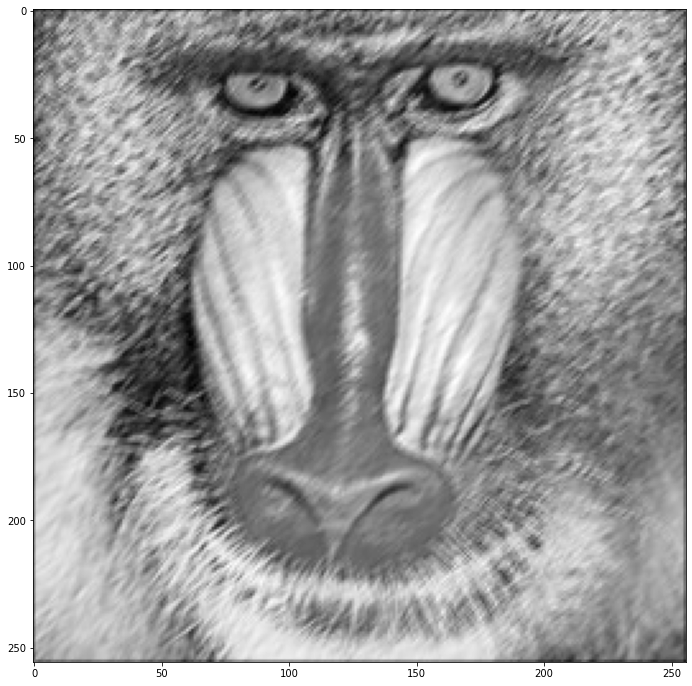

In [13]:
fig = plt.figure(figsize=(15, 12))
plt.imshow(out,cmap="gray")